In [573]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [574]:
from useful_scit.imps import *

In [575]:
sys.path.append('../../../ubinas-2019/')

In [576]:

from ubinas_2019.util import *
import ubinas_2019.util

In [577]:
ds2 = import_so2_data()
ds2.index=pd.PeriodIndex(ds2.index,freq='1min')
ds2 = ds2.resample('2h',loffset='1h').mean()

In [578]:
ds4 = import_acsm_data()
ds4.index=pd.PeriodIndex(ds4.index,freq='1min')
ds4 = ds4.resample('2h',loffset='1h').mean()

In [587]:
ds5 = pd.merge(ds2[C_SO2],ds4[C_SO4],left_index=True,right_index=True)

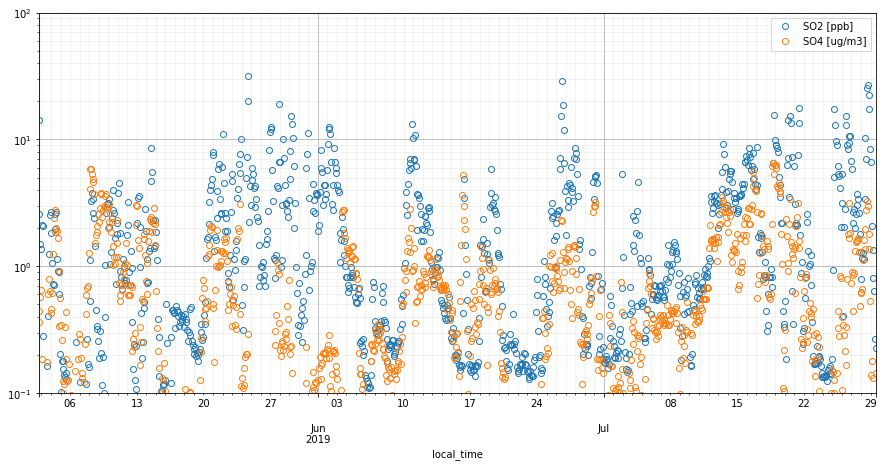

In [588]:
fig,ax = plt.subplots()
# ds5 = ds5['2019-07-19':'2019-07-20']
ds5.plot(figsize=(15,7),style='o',mfc='none',ax=ax)

# ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=0,interval=1))
# ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
# ax.figure.autofmt_xdate()
ax.grid(True,'major',alpha=1)
ax.grid(True,'minor',alpha=.2)
ax.set_ylim(.1,100)
ax.set_yscale('log')

(0.1, 20)

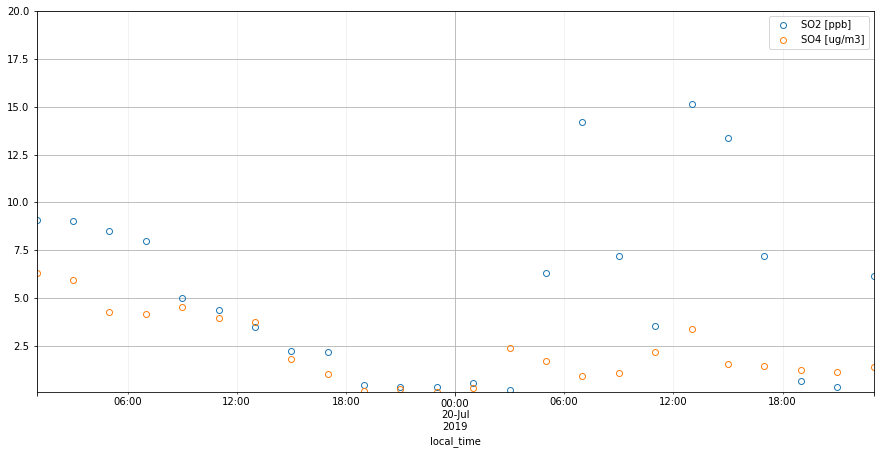

In [586]:
fig,ax = plt.subplots()
ds5 = ds5['2019-07-19':'2019-07-20']
ds5.plot(figsize=(15,7),style='o',mfc='none',ax=ax)

# ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=0,interval=1))
# ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
# ax.figure.autofmt_xdate()
ax.grid(True,'major',alpha=1)
ax.grid(True,'minor',alpha=.2)
ax.set_ylim(.1,20)
# ax.set_yscale('log')

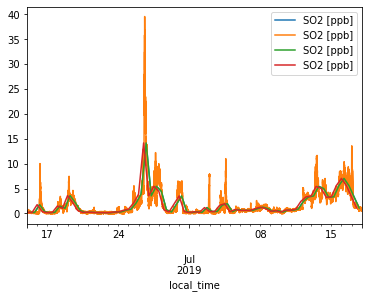

In [327]:
fig,ax = plt.subplots()

ds3[[C_SO2]].plot(ax=ax)
ds2[[C_SO2]].plot(ax=ax)
ds3[[C_SO2]].plot(ax=ax)
ds4[[C_SO2]].plot(ax=ax)
# ax.set_xlim('2019','2020')

In [244]:
ds = get_joined_ds()

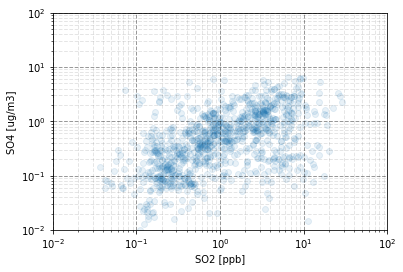

In [435]:
fig,ax = plt.subplots()
ax.scatter(C_SO2,C_SO4,alpha=.1,data=ds5)
ax.set_xlim(.01,100)
ax.set_ylim(.01,100)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(C_SO2)
ax.set_ylabel(C_SO4)
ax.grid(True,'major',color='k', linestyle='--', linewidth=1, alpha=.4)
ax.grid(True,'minor',color='k', linestyle='--', linewidth=1, alpha=.1)

In [449]:
from sklearn.cluster import KMeans

In [450]:
ds6 = np.log(ds5).dropna()

/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [511]:
X = ds6.values
nc = 9
kmeans= KMeans(n_clusters=nc).fit(X)
labs = kmeans.labels_

In [512]:
ds6['labs']=labs

In [513]:
cols = sns.color_palette('Set1',nc)

(-8, 3)

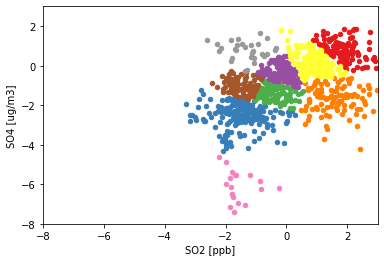

In [520]:
fig,ax = plt.subplots()
for c in range(nc):
    ds6[ds6['labs']==c].plot.scatter(C_SO2,C_SO4,ax=ax,color = cols[c])
ax.set_xlim(-8,3)
ax.set_ylim(-8,3)

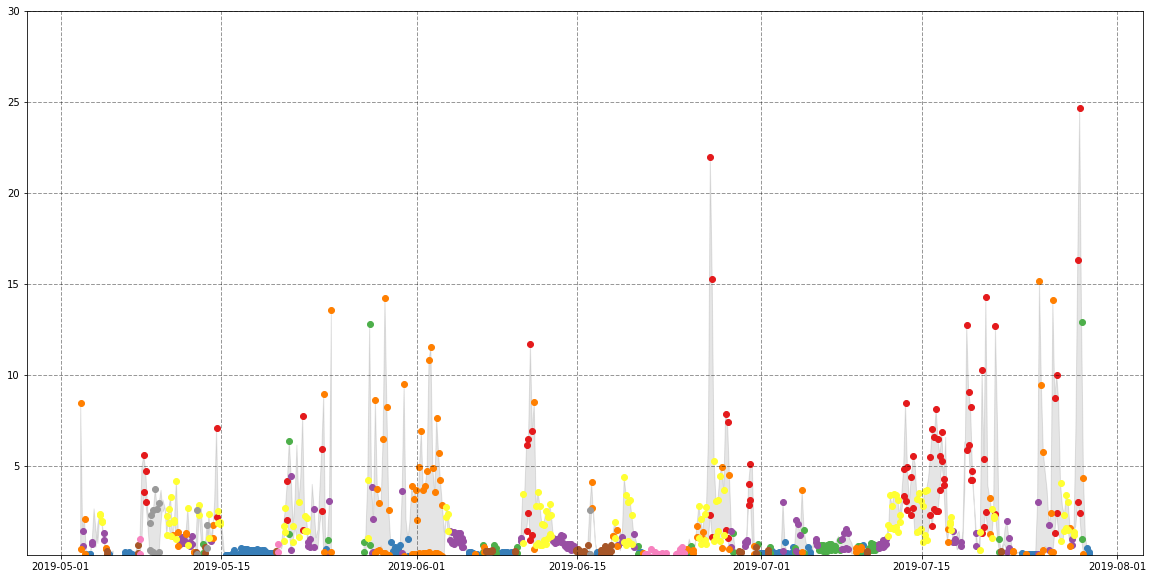

In [572]:
fig,ax = plt.subplots(figsize=(20,10))
ds7=ds6.copy()
ds7[[C_SO2,C_SO4]]=np.e**ds6[[C_SO2,C_SO4]]
ds7=ds7.resample('4h',loffset='2h').mean()
ax.fill_between(ds7.index,ds7[C_SO2],ds7[C_SO4],color='k',alpha=.1)
# ds7[C_SO2].plot(ax=ax,alpha=1,style=':k')
# ds7[C_SO4].plot(ax=ax,alpha=1,style=':k')
for c in range(nc):
    dds = ds7[ds7['labs']==c]
    dds=dds.resample('4h',loffset='2h').mean()
    ax.scatter(dds.index,dds[C_SO2],color=cols[c])
    ax.scatter(dds.index,dds[C_SO4],color=cols[c])
#     dds[C_SO2].plot(ax=ax,color=cols[c])
#     dds[C_SO4].plot(ax=ax,color=cols[c])
#     ax.plot(dds.index,dds[C_SO4],color=cols[c])
#     ax.plot(dds.index,dds[C_SO2],color=cols[c])
#     ds6[[C_SO2]][ds6['labs']==c].plot(ax=ax,color=cols[c])
# ax.set_xlim(.01,100)
ax.set_ylim(.1,30)
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlabel(C_SO2)
# ax.set_ylabel(C_SO4)
ax.grid(True,'major',color='k', linestyle='--', linewidth=1, alpha=.4)
ax.grid(True,'minor',color='k', linestyle='--', linewidth=1, alpha=.1)

In [567]:
ds = get_joined_ds()
ds1 = ds
ds1 = ds1.resample('2H').mean()

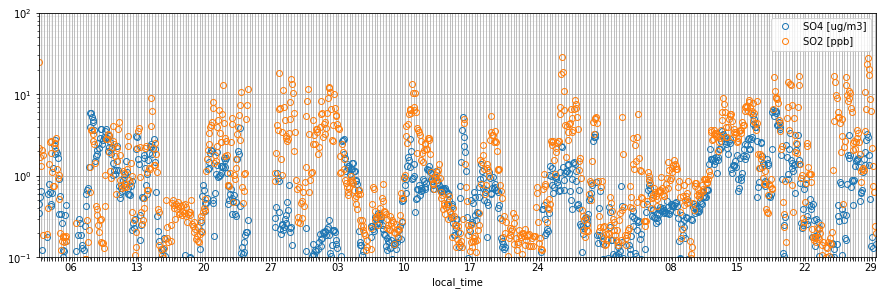

In [571]:
import matplotlib.dates as mdates
ax = ds1[[C_SO4,C_SO2]].plot(figsize=(15,5),style='o',alpha=1,mfc='none')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=0,interval=1))
# ax.xaxis.set_minor_locator(mdates.DayLocator(interval=5))
ax.figure.autofmt_xdate()
ax.grid(True,'major',alpha=1)
ax.grid(True,'minor',alpha=.2)
ax.set_ylim(.1,100)
ax.set_yscale('log')